
# Follow-up exercises: Introduction to Python


Student: Nicolò Trevisani


## 0. From the scipy-lectures, reproduce and comment the basic examples from the introduction sections


The [spicy lectures](http://scipy-lectures.org/intro/language/python_language.html) introduces some basic concepts of python. Among them:
- Basic Types; 
- Control Flow; 
- Functions Definition.

Here, I am listing the most interesting examples I found, among the ones presented there.

### Lists


Regarding lists, I would like to mention a feature of the _slicing_ that I did not think it was possible until we saw it in the lectures.

Using the *slicing*, it is in fact possible to insert new elements in a list in a specific position.

In [1]:
colors = ['red', 'blue', 'green', 'black', 'white']

# I want to insert three new elements to the 'color' list,
# just after the 'blue' element
colors[2:2] = ['gray', 'purple', 'pink']

colors

['red', 'blue', 'gray', 'purple', 'pink', 'green', 'black', 'white']

But also replace one (or more) element with an arbitrary number of new elements.

In [2]:
colors = ['red', 'blue', 'green', 'black', 'white']

# I want to remove the 'green' element and insert three new elements 
# to the 'color' list
colors[2:3] = ['gray', 'purple', 'pink']

colors

['red', 'blue', 'gray', 'purple', 'pink', 'black', 'white']

### Control flow

Also for control flow, I try to put here examples of aspects of python I was not expecting.

The first thing is the structure of the _for_ iteration, which can be *closed* with an else.

In [3]:
# In this case, the 'for' ends with an 'else' statement
for word in ('cool', 'powerful', 'readable'):
    print('Python is %s' % word)
else:
    print("But also many more things")

Python is cool
Python is powerful
Python is readable
But also many more things


In [4]:
# Here, the 'else' statement is skipped, since the 'for'
# was broken before finishing
for word in ('cool', 'powerful', 'readable'):
    print('Python is %s' % word)
    if word == 'readable':
        break
else:
    print("But also many more things")    

Python is cool
Python is powerful
Python is readable


I found interesting also the _enumerate_ function, which allows to easily iterate over the indics and the items of a list.

In [5]:
words = ('cool', 'powerful', 'readable')
for index, item in enumerate(words):
    print((index, item))

(0, 'cool')
(1, 'powerful')
(2, 'readable')


### Functions

Again, some examples of counterintuitive (at least to me) behaviours of functions in python.

First of all, default values are evaluated when the function is defined, not when it is called.
This fact produces different results when the _default value_ is mutable or immutable. 

In [6]:
# Using an immutable object (int)
bigx = 10

def double_it(x=bigx):
     return x * 2

bigx = 1e9  # Now really big
print(double_it())

# Now explicitly passing the new value of bigx
print(double_it(1e9))


20
2000000000.0


In this first case, the default value bigx is evaluated when the function double_it is created. 
This means that when double_it is called without passing it any explicit value, it uses the value of bigx it got when it was defined.
Of course, if the new value of bigx is explicitly given to the function, it uses the new one.

On the other hand, using a mutable type object in a keyword argument (and modifying it inside the function body) produces a different result.

In [7]:
def add_to_dict(args={'a': 1, 'b': 2}):
    for i in args.keys():
        args[i] += 1
    print(args)

add_to_dict()
add_to_dict()
add_to_dict()


{'a': 2, 'b': 3}
{'a': 3, 'b': 4}
{'a': 4, 'b': 5}


Since dictionaries are mutable objects, their values can actually be modified permanently by the function.

A similar example is given by the following exercise.

In general, when a variable is passed to a function, python gives the reference to the object to which the variable refers (value), not the variable itself.

This means that if the value passed to a function is immutable, the function does not modify the variable. On the other hand, if the value is mutable, the function may modify the variable.

In [8]:
def try_to_modify(x, y, z):
    x = 23
    y.append(42)
    z = [99] # new reference
    print("x:",x)
    print("y:",y)
    print("z:",z)

a = 77    # immutable variable
b = [99]  # mutable variable
c = [28]

try_to_modify(a, b, c)

print()

print("a:",a)
print("b:",b)
print("c:",c)

x: 23
y: [99, 42]
z: [99]

a: 77
b: [99, 42]
c: [28]


In this example:
- a = 77: an int is an immutable object and cannot be modified by the function;
- b = [99]: a list is a mutable object, so that _appending_ a new value to y inside the function actually modifies also b;
- c = [28]: also c is a list, so that it is a mutable object. On the other hand, z gets assigned a new value _inside_ the function. In this case, z 'lives' only inside the scope of the function, so that outside c keeps the value it was originally assigned.

In general, variables declared outside the function can be referenced within the function.

In [9]:
x = 5

def addx(y):
    return x + y

addx(10)

15

These variables can be modified inside the function, but the changes are not propagted outside it. For example:

In [10]:
x = 5

def setx(y):
    x = y
    print('x is %d' % x)

setx(10)
print(x)

x is 10
5


If we really want to do so, we need to decalre the variables as **global** inside the function.

In [11]:
x = 5

def setx(y):
    # now we can globally modify x
    global x 
    x = y
    print('x is %d' % x)

setx(10)
print(x)

x is 10
10


## 1. Compute the decimals of $\pi$ using the Wallis formula


According to the [Wallis formula](https://en.wikipedia.org/wiki/Wallis_product), $\pi$ can be obtained by the following product:

# $$ \pi = 2 \prod_{i = 1}^{\infty} \frac{4 i^2}{4 i^2 - 1 } $$

I decided to implement it by using a simple _for_ iteration, as follows:

In [12]:
import math

# Getting the value of pi from python, to estimate the precision of the algorithm
math_pi = math.pi

# Initializing the 'pi' I want to use in the code
pi = 2

# Asking how many iterations the user would like to use for pi estimation
up_to = input("Please tell me how many products to you want to compute: ")
print("\n")

# Check if the 'up_to' parameter is an int
try:
    up_to = int(up_to)
    # Check if 'up_to' is positive
    if up_to > 0:
        # Actual calculation
        for i in range(1,up_to):
            pi *= 4*(i**2) / (4*(i**2) - 1)
        # Just printing the result once the iterations are done
        else:
            print("After {0} iterations, I get the following value for pi: {1:.6f}".format(up_to, pi))
            print("Comparing with the value of pi I get from python (%.6f)," %(math_pi))
            precision = 100. * (math_pi - pi) / (math_pi)
            print("I can say I reached a precision of %.6f%%" %(precision))
    else:
        print("I need a positive number as input:") 
        print(up_to, "is not a positive number")        
except ValueError:
    print("I need an integer number as input:") 
    print(up_to, "is not an integer number")

Please tell me how many products to you want to compute: 10


After 10 iterations, I get the following value for pi: 3.060035
Comparing with the value of pi I get from python (3.141593),
I can say I reached a precision of 2.596075%


After some tests, it seems that the precision of the algorithm, defined as the _relative distance_ between the result and the actual value of $\pi$, goes as $\frac{25}{n}$%.

e.g.:
- After 100 iterations: 0.25%
- After 1000 iterations: 0.025%
- After 10000 iterations: 0.0025%

## 2. Write a function that displays the n first terms of the Fibonacci sequence



The [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number) is defined such that each number is the sum of the two preceding ones, starting from 0 and 1:

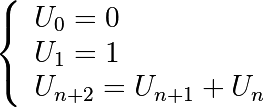

The implementation of the sequence itself is just a small part of the function and is based on a _for_ iteration.

I tried to focus more on the _defensive programming_ part, trying to ensure that in case incorrect inputs are given, the code does not crash, but gives a short explanation of why the output is not the expected one.
In particular, I implemented the following *protections*:
- the variable _n_ has to be an integer. If not, a _ValueError_ exception is called;
- the number _n_ of terms has to be positive;
- in case _n_ is 0, a message says that no output will be shown, since this is the meaning of requiring 0 element of a sequence.

The same protections have been implemented in the previous exercise. In that case, on the other hand, I did not use a function to define the actual implementation of the calculation and this lead to a less readable and more complex code.
This can be one of the many reason to prefer modular programming.

In [13]:
def fibonacci(n = 10):
    """ This function prints the first n terms of the fibonacci sequence.
    
    If 'n' is not specified, 10 is taken as default value.
    The funcion accepts only positive integer numbers as input.
    No output is produced in case 'n' is 0.
    """
       
    # Check if the 'n' parameter is an int
    try:
        n = int(n)
    except ValueError:
        print("I need an integer number as input:") 
        print(n, "is not an integer number")
        return
        
    # If 'n' is an int, it has to be positive
    if n < 0:
        print("I need a positive integer number as input:")
        print(n, "is negative")
        return

    # Special case: 'n' = 0 
    if n == 0:
        print("You are asking me to print the first 0 terms of a sequence!")
        print("No output will be produced.")
        return
    
    # Special case: 'n' = 1
    if n == 1:
        print("The first term of the fibonacci sequence is:")
    else:
        print("The first " + str(n) + " terms of the fibonacci sequence are:")

    # Actual implementation of the sequence
    a, b = 0, 1
    for i in range(n):
        print(a, end = '\n')
        a, b = b, a + b

# Just to check if the dockstring is properly shown        
#fibonacci?
        
n_terms = input("Please tell me how many terms of the Fibonacci sequence you want me to print: ")
print()
fibonacci(n_terms)

Please tell me how many terms of the Fibonacci sequence you want me to print: 10

The first 10 terms of the fibonacci sequence are:
0
1
1
2
3
5
8
13
21
34


## 3. Implement the quicksort algorithm


The quicksort algorithm allows to efficiently order the elements of an array.
The idea is to select one element of the array, called pivot, and to put to its _left_ all the elements of the array smaller to it and to its _right_ all the elements greater or equal to it.
Operating iteratively on the two subsets of elements of the array created, it is possible to sort the array.

The general idea of how the algoritm works is described below:

    function quicksort(array)
        var list less, greater
        if length(array) < 2
            return array
        select and remove a pivot value pivot from array
        for each x in array
            if x < pivot + 1 then append x to less
            else append x to greater
        return concatenate(quicksort(less), pivot, quicksort(greater))

The python implementation follows. Here I tried to implement some protections, similarly to the previous cases:
- the input has to be a list;
- the element of the list have to be real numbers, so that it makes sense to order them.

In [14]:
def quicksort(array): 
    """This function uses quicksort to order arrays.
    
    Given an array, the function considers the first
    element as a pivot, and splits the array in three 
    parts: the first one with all the values smaller
    than the pivot, the second one is the pivot itself,
    and the third one with all the values greater than the 
    pivot. Operating iteratively, it sorts the array.
    """

    
    # Check if the 'array' parameter is a list
    # of real numbers
    try:
        test = list(array)
    except TypeError:
        print("I need a list:") 
        print(array, "is not a list")
        return

    if (all(isinstance(x, int) for x in array) == False
    and all(isinstance(x, float) for x in array) == False): 
        print("This is not a list of real numebrs")
        print("I do not know how to sort this")
        return

    # Initialize three lists of elements of the array
    # depending on their relative value with respect to the pivot
    smaller = []
    pivot = []
    greater = []

    # Do this only if the array contains more than one element
    if len(array) > 1:
        # The pivot is the first element of the array
        pi = array[0]
        # Pivot just has one value
        pivot.append(pi)
        # Scan the array (skipping the pivot) 
        # and split it depending on the 
        # values of the elements with respect to the pivot
        for x in array[1:]:
            if x < pi:
                smaller.append(x)
            else: 
                greater.append(x)
        # Return the concatenation of the three lists,
        # properly ordered
        return quicksort(smaller)+pivot+quicksort(greater)  
    # If the array has just one element,
    # directly return it
    else:
        return array

In [16]:
from random import randint

arr=[]
for i in range(10):
    arr.append(randint(1, 100))

# Just for testing with lists of
# non-real numbers
#arr.append(2j)
#arr = "pizza"

print("Original array:")
print(arr)

print()

# Check if the 'array' parameter is a list
try:
    arr = list(arr)
    new_arr = quicksort(arr)
    print ("Sorted array:") 
    print(new_arr)    
except TypeError:
    print("I need a list:") 
    print(arr, "is not a list")


Original array:
1

I need a list:
1 is not a list
